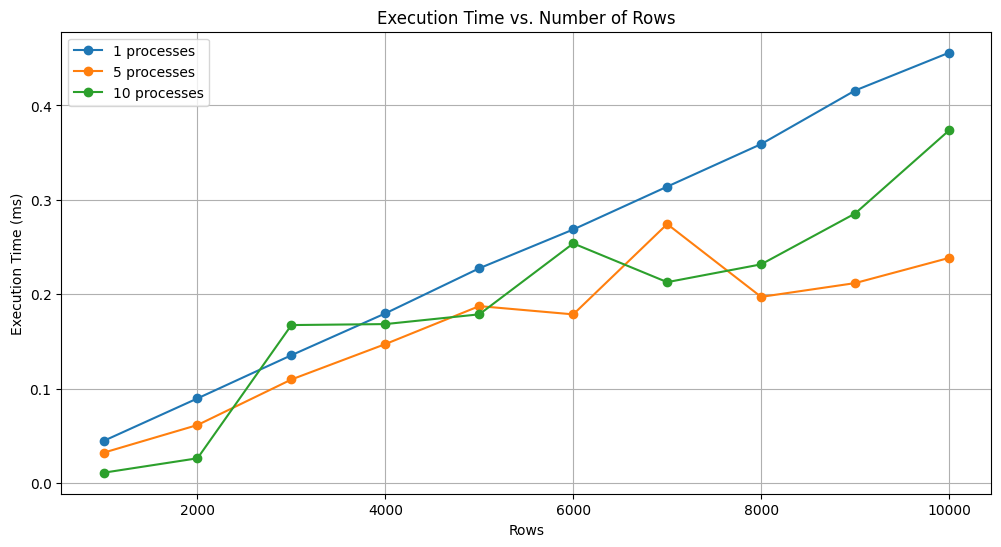

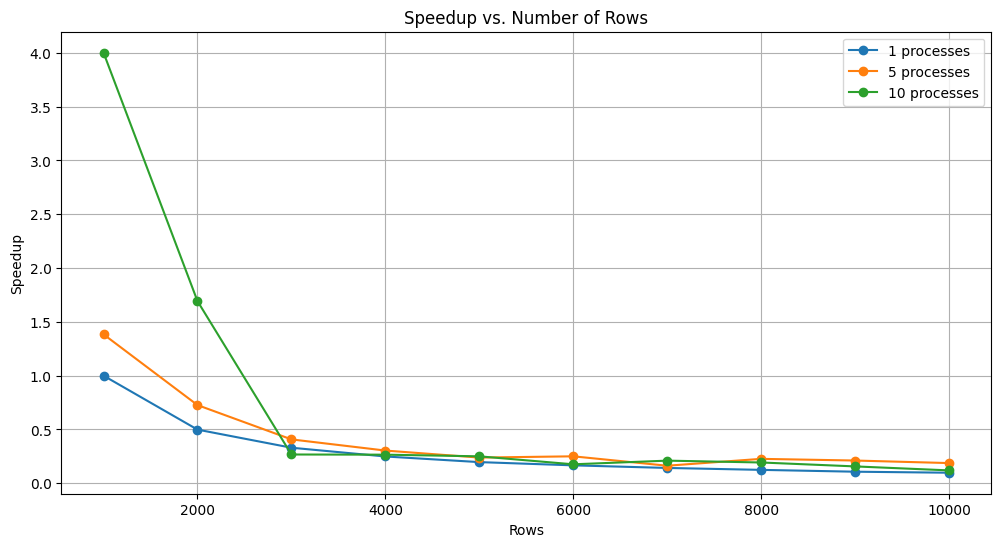

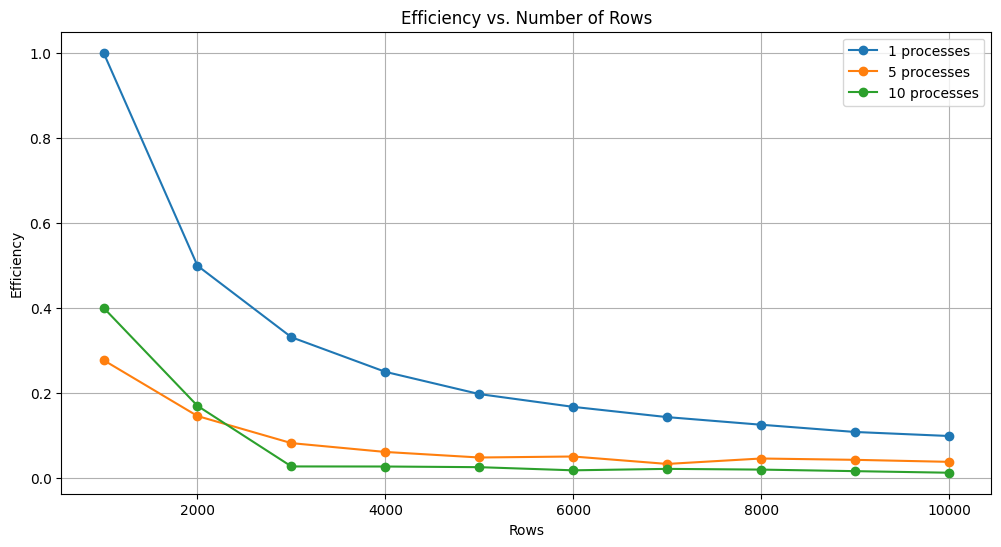

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_data(file_path):
    data = pd.read_csv(file_path, header=None, names=['Processes', 'Rows', 'Cols', 'TimeRows', 'TimeCols', 'TimeBlocks'])
    return data

def calculate_speedup(df, time_col):
    base_time = df.loc[df['Processes'] == 1, time_col].values[0]
    df['Speedup'] = base_time / df[time_col]
    return df

def calculate_efficiency(df):
    df['Efficiency'] = df['Speedup'] / df['Processes']
    return df

def plot_results(df, x_col, y_col, title, output_file, ylabel):
    plt.figure(figsize=(12, 6))
    for process_count in df['Processes'].unique():
        subset = df[df['Processes'] == process_count]
        plt.plot(subset[x_col], subset[y_col], marker='o', linestyle='-', label=f'{process_count} processes')

    plt.xlabel(x_col)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'data_first/{output_file}')
    plt.show()

file_path = 'data_first/results.csv'
data = load_data(file_path)

time_col = 'TimeRows'

data = calculate_speedup(data, time_col)
data = calculate_efficiency(data)

plot_results(data, 'Rows', 'TimeRows', 'Execution Time vs. Number of Rows', 'execution_time_plot.png', 'Execution Time (ms)')
plot_results(data, 'Rows', 'Speedup', 'Speedup vs. Number of Rows', 'speedup_plot.png', 'Speedup')
plot_results(data, 'Rows', 'Efficiency', 'Efficiency vs. Number of Rows', 'efficiency_plot.png', 'Efficiency')